# Visualizing the Vaccination Dataset

The covid-19 pandemic has infected the globe for almost three years and it continues to issue a threat to all of us.  Vaccination is one of the efforts that took place in every country in the world to stop the spread of the virus.  The goal of the activity is for you to look at the vaccination efforts of the different countries as compared to what was done in the Philippines.

Document all parts of your code using the text cell/section in Colab.   Include a section to discuss your findings.

## Rubric
| Criteria                     | Poor | Fair  | Good  | Very Good  |
|------------------------------|------|------|------|-----------|
|  1.  **Correctness of the Output**   | No Submission. *(0 Point)*| Less than 50% of the target output was met. *(1 Point)* | At least 50% of the target output was met. *(2 Points)* | All of the target output was met. *(3 Points)* |
| 2.  **Correctness of the Algorithm** | No Submission *(0 Point)* | The applied algorithm needs major revision. *(1 Point)* | The applied algorithm needs minor revision. *(3 Points)* | The applied algorithm is correctly implemented. *(6 Points)* |
| 3.  **Documentation** | No Submission. *(0 Point)* | Less than 50% of the code is documented. *(1 Point)* | 70% of the code is documented. *(2 Points)* | 100% of the code is documented. *(3 Points)*

In [1]:
# do not change this cell/section
# run this section to initialize your dataset

import pandas as pd
import matplotlib.pyplot as plt

# google resource initialization
url = 'https://drive.google.com/file/d/1QkoBcQhR9zVZq44SM1zziROXZGiDPhlv/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

# read the dataset
dataset = pd.read_csv(dwn_url)

In [2]:
dataset.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


## Data Analysis

Your first task is to visualize the overall vaccination efforts (`total_vaccinations`) of the `United States` and `China` as compared to the efforts of the `Philippines`, `Malaysia`, and `Vietnam`.  Discuss your perception of the data presented in the figure.

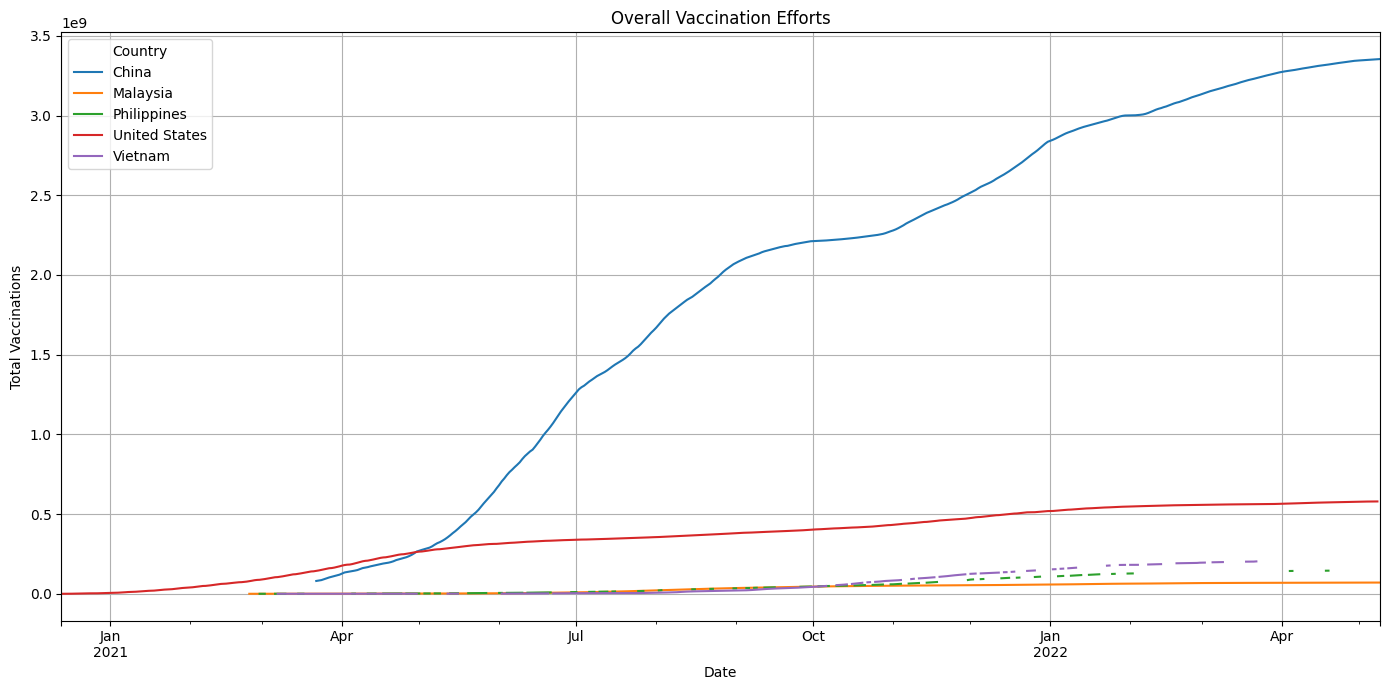

In [22]:
#Filter for selected countries
countries = ['United States', 'China', 'Philippines', 'Malaysia', 'Vietnam']
subset = dataset[dataset['location'].isin(countries)]

#convert date column to datetime then group the relevant data
subset.loc[:, 'date'] = pd.to_datetime(subset['date']) #sabi ni error message na eto yung gagamitin, so heto na
plot_data = subset.pivot(index='date', columns='location', values='total_vaccinations')

#line chart
plot_data.plot.line(figsize=(14, 7), marker='')

plt.title('Overall Vaccination Efforts')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()



In [11]:
# the line graph shows that both US and China have drastically higher total_vaccinations than that of the rest of the countries
# China reaching a staggering high number of total vaccinations by the tail end of April 2022,while China also leading by a large margin
# the Philippines, Vietnam and Malaysia started later and followed a more gradual increase compared to US
# Gaps later on for these countries shows disparities in access and rollout speed.

Your second task is to create a visualization that will compare the different abovementioned countries on the total number of individuals that they have vaccinated (`people_vaccinated`),  fully vaccinated (`people_fully_vaccinated`), and the number of boosters they have administered (`total_boosters`).  Discuss your perception of the data presented in the figure.

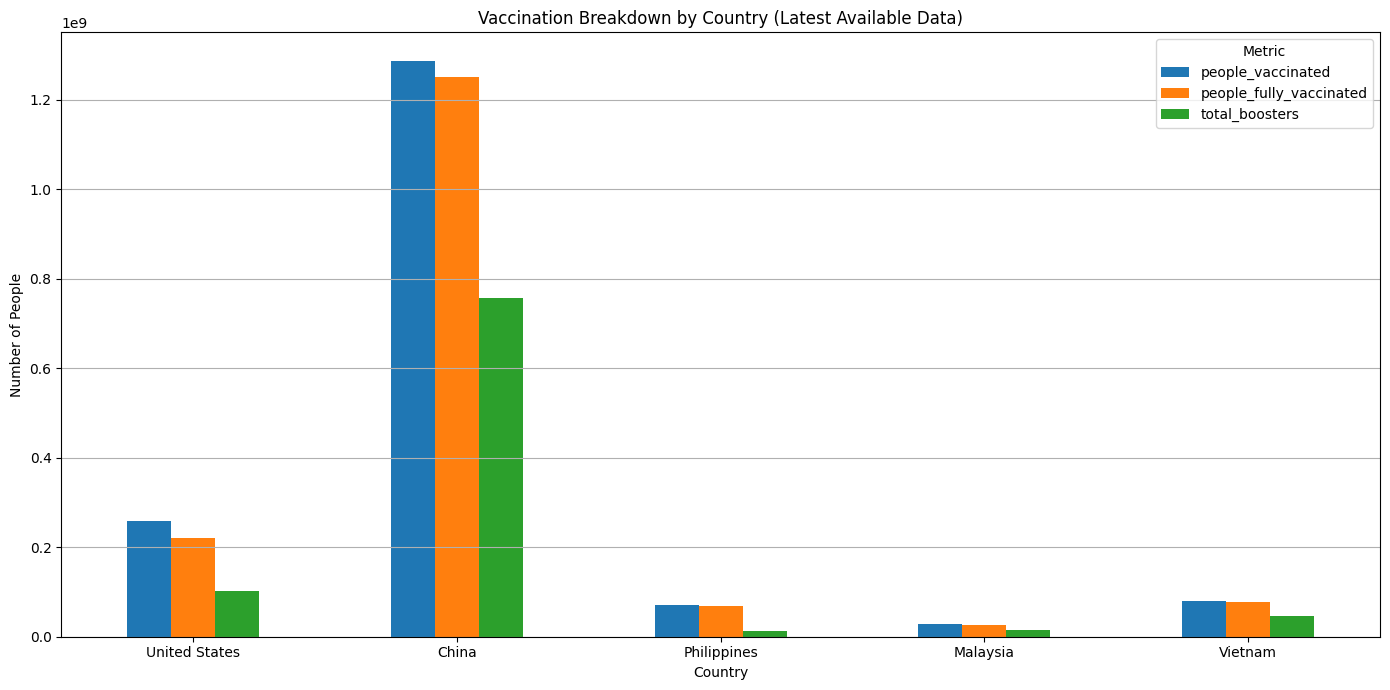

In [9]:
#get latest(or the last) data for each country (this will show it's latest update)
latest = subset.sort_values('date').groupby('location').last()
bar_df = latest[['people_vaccinated', 'people_fully_vaccinated', 'total_boosters']].loc[countries]

bar_df.plot.bar(figsize=(14, 7), rot=0)

plt.title('Vaccination Breakdown by Country')
plt.ylabel('Number of People')
plt.xlabel('Country')
plt.grid(True, axis='y')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [7]:
# Bar Graphs are good at comparing and highlighting multiple data, and i quote.. " Bar charts are easy for our eyes to read. Our eyes compare the end
# points of the bars, so it is easy to see quickly which category is the
# biggest, which is the smallest, and also the incremental difference
# between categories.

# Of course China leads in all 3 of these metrics by a landslide with US following,
# by observing we can also easily tell that SEA countries have less overall boosters and vaccinated people (though ratio between vaccinated people and total population may not be accounted for)
# this indicates one of few things
# China is heavily impacted by the pandemic and made sure to have the resources to prevent it
# SEA countries might have less access to vaccines or was less impacted by the pandemic
# zzzzz
# goodnight